<a href="https://colab.research.google.com/github/marioalejandrohernandez/Regresion-Lineal-Simple/blob/main/Act4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [177]:
df = pd.read_csv("DF_Mexico.csv")


#**Quitar Columnas Innecesarias**

In [178]:
columnas_deseadas = [
    'reviews_per_month',
    'review_scores_communication',
    'number_of_reviews',
    'availability_365',
    'review_scores_cleanliness',
    'review_scores_location',
    'host_acceptance_rate',
    'price',
    'host_response_rate'
]

df = df[columnas_deseadas]
df


,reviews_per_month,review_scores_communication,number_of_reviews,availability_365,review_scores_cleanliness,review_scores_location,host_acceptance_rate,price,host_response_rate
0,0.19,4.95,21,324,4.95,5.00,NaN,"$1,434.00",100%
1,0.54,5.00,61,346,4.88,4.95,NaN,$830.00,NaN
2,0.31,4.92,39,87,4.71,4.58,90%,"$1,469.00",100%
3,NaN,NaN,0,363,NaN,NaN,NaN,"$3,658.00",NaN
4,0.46,4.78,64,357,4.70,4.98,86%,"$18,000.00",100%
...,...,...,...,...,...,...,...,...,...
24219,NaN,NaN,0,352,NaN,NaN,100%,$760.00,100%
24220,NaN,NaN,0,365,NaN,NaN,NaN,"$1,520.00",NaN
24221,NaN,NaN,0,180,NaN,NaN,96%,$533.00,NaN
24222,NaN,NaN,0,344,NaN,NaN,100%,"$1,200.00",100%


**Quitamos Simbolos que puedan afectar posteriormente la lectura**

In [179]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float) / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

<ipython-input-179-9e0dc18fb944>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   reviews_per_month            20628 non-null  float64
 1   review_scores_communication  20572 non-null  float64
 2   number_of_reviews            24224 non-null  int64  
 3   availability_365             24224 non-null  int64  
 4   review_scores_cleanliness    20573 non-null  float64
 5   review_scores_location       20571 non-null  float64
 6   host_acceptance_rate         22181 non-null  float64
 7   price                        24224 non-null  float64
 8   host_response_rate           21133 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.7 MB


In [181]:
valores_nulos = df.isnull().sum()
valores_nulos

reviews_per_month              3596
review_scores_communication    3652
number_of_reviews                 0
availability_365                  0
review_scores_cleanliness      3651
review_scores_location         3653
host_acceptance_rate           2043
price                             0
host_response_rate             3091
dtype: int64

#**Procesamiento de valores nulos**


In [182]:
df1 =df.copy()


df1["reviews_per_month"]=df1["reviews_per_month"].fillna(round(df["reviews_per_month"].mean(),1))
df1["review_scores_communication"]=df1["review_scores_communication"].fillna(round(df["review_scores_communication"].mean(),1))
df1["review_scores_cleanliness"]=df1["review_scores_cleanliness"].fillna(round(df["review_scores_cleanliness"].mean(),1))
df1["review_scores_location"]=df1["review_scores_location"].fillna(round(df["review_scores_location"].mean(),1))
df1["host_acceptance_rate"] =df1["host_acceptance_rate"].fillna(method="bfill")
df1["host_response_rate"] =df1["host_response_rate"].fillna(method="bfill")

valores_nulos = df1.isnull().sum()
valores_nulos

reviews_per_month              0
review_scores_communication    0
number_of_reviews              0
availability_365               0
review_scores_cleanliness      0
review_scores_location         0
host_acceptance_rate           0
price                          0
host_response_rate             1
dtype: int64

##**Outilers**

<Figure size 1500x800 with 0 Axes>

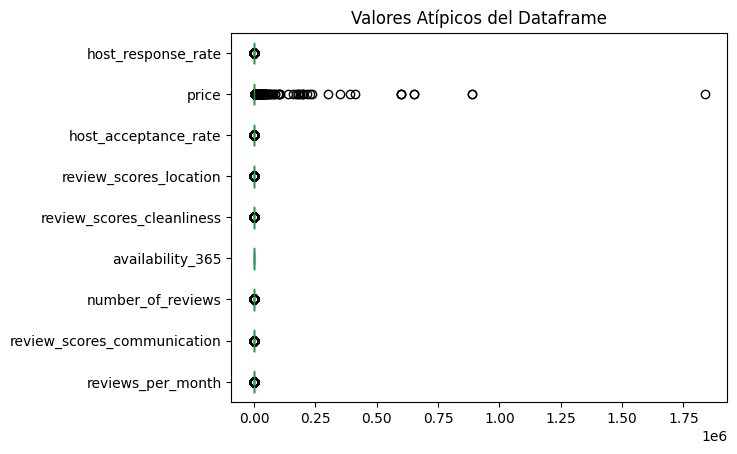

In [183]:
fig = plt.figure(figsize =(15, 8))
df1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**Outliers Con Desviacion**

In [184]:
y=df1
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido reviews_per_month                  6.966878
review_scores_communication        5.996082
number_of_reviews                226.110805
availability_365                 617.302497
review_scores_cleanliness          5.994457
review_scores_location             5.883035
host_acceptance_rate               1.542260
price                          56493.738888
host_response_rate                 1.494245
dtype: float64
Limite inferior permitido reviews_per_month                 -3.562731
review_scores_communication        3.630301
number_of_reviews               -152.940395
availability_365                -126.114915
review_scores_cleanliness          3.484257
review_scores_location             3.772378
host_acceptance_rate               0.284964
price                         -52688.378666
host_response_rate                 0.395809
dtype: float64


In [185]:
df2= df1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df2

,reviews_per_month,review_scores_communication,number_of_reviews,availability_365,review_scores_cleanliness,review_scores_location,host_acceptance_rate,price,host_response_rate
0,0.19,4.95,21.0,324,4.95,5.00,0.90,1434.0,1.0
1,0.54,5.00,61.0,346,4.88,4.95,0.90,830.0,1.0
2,0.31,4.92,39.0,87,4.71,4.58,0.90,1469.0,1.0
3,1.70,4.80,0.0,363,4.70,4.80,0.86,3658.0,1.0
4,0.46,4.78,64.0,357,4.70,4.98,0.86,18000.0,1.0
...,...,...,...,...,...,...,...,...,...
24219,1.70,4.80,0.0,352,4.70,4.80,1.00,760.0,1.0
24220,1.70,4.80,0.0,365,4.70,4.80,0.96,1520.0,1.0
24221,1.70,4.80,0.0,180,4.70,4.80,0.96,533.0,1.0
24222,1.70,4.80,0.0,344,4.70,4.80,1.00,1200.0,1.0


In [186]:
valores_nulos=df2.isnull().sum()
valores_nulos

reviews_per_month              306
review_scores_communication    363
number_of_reviews              564
availability_365                 0
review_scores_cleanliness      390
review_scores_location         343
host_acceptance_rate           930
price                           36
host_response_rate             804
dtype: int64

In [187]:
df=df2.copy()
df=df.fillna(round(df2.mean(),1))
valores_nulos=df.isnull().sum()
valores_nulos

reviews_per_month              0
review_scores_communication    0
number_of_reviews              0
availability_365               0
review_scores_cleanliness      0
review_scores_location         0
host_acceptance_rate           0
price                          0
host_response_rate             0
dtype: int64

In [188]:
df

,reviews_per_month,review_scores_communication,number_of_reviews,availability_365,review_scores_cleanliness,review_scores_location,host_acceptance_rate,price,host_response_rate
0,0.19,4.95,21.0,324,4.95,5.00,0.90,1434.0,1.0
1,0.54,5.00,61.0,346,4.88,4.95,0.90,830.0,1.0
2,0.31,4.92,39.0,87,4.71,4.58,0.90,1469.0,1.0
3,1.70,4.80,0.0,363,4.70,4.80,0.86,3658.0,1.0
4,0.46,4.78,64.0,357,4.70,4.98,0.86,18000.0,1.0
...,...,...,...,...,...,...,...,...,...
24219,1.70,4.80,0.0,352,4.70,4.80,1.00,760.0,1.0
24220,1.70,4.80,0.0,365,4.70,4.80,0.96,1520.0,1.0
24221,1.70,4.80,0.0,180,4.70,4.80,0.96,533.0,1.0
24222,1.70,4.80,0.0,344,4.70,4.80,1.00,1200.0,1.0


In [189]:
Corr_Factors=df.corr()
Corr_Factors
#Observamos que casi no hay correlacion entre nuestras variables

,reviews_per_month,review_scores_communication,number_of_reviews,availability_365,review_scores_cleanliness,review_scores_location,host_acceptance_rate,price,host_response_rate
reviews_per_month,1.000000,0.000808,0.408887,0.064488,0.036725,-0.008998,0.234671,-0.000377,0.116323
review_scores_communication,0.000808,1.000000,0.071582,-0.094554,0.470378,0.349151,-0.006550,0.018336,0.077859
number_of_reviews,0.408887,0.071582,1.000000,-0.070101,0.085308,0.086574,0.155714,-0.042819,0.091404
availability_365,0.064488,-0.094554,-0.070101,1.000000,-0.060237,-0.063446,0.013097,0.026522,-0.019861
review_scores_cleanliness,0.036725,0.470378,0.085308,-0.060237,1.000000,0.316358,0.034701,0.041012,0.073392
review_scores_location,-0.008998,0.349151,0.086574,-0.063446,0.316358,1.000000,-0.000774,0.059556,0.035034
host_acceptance_rate,0.234671,-0.006550,0.155714,0.013097,0.034701,-0.000774,1.000000,0.022476,0.247070
price,-0.000377,0.018336,-0.042819,0.026522,0.041012,0.059556,0.022476,1.000000,0.016372
host_response_rate,0.116323,0.077859,0.091404,-0.019861,0.073392,0.035034,0.247070,0.016372,1.000000


#**Modelado**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

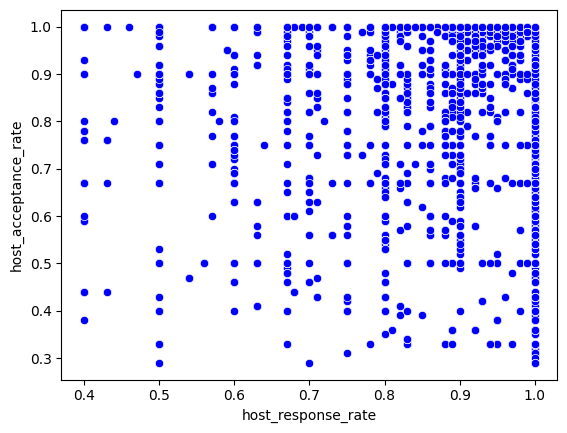

In [190]:
from turtle import color
#host_acceptance_rate vs host_response_rate
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df)

In [191]:
Vars_Indep= df[['host_response_rate']]
Var_Dep= df['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__



{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.36427054]),
 'rank_': 1,
 'singular_': array([11.83678904]),
 'intercept_': 0.5913524402458404}

In [192]:
coef_Deter1=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter1

0.0610436445304825

**y = 0.36host_response_rate + 0.59**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

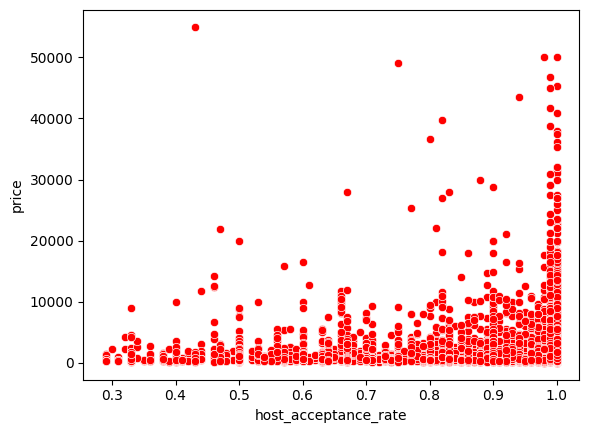

In [193]:
#host_acceptance_rate vs price
sns.scatterplot(x='host_acceptance_rate', y='price', color="red", data=df)

In [194]:
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['price']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([424.56747544]),
 'rank_': 1,
 'singular_': array([17.45169945]),
 'intercept_': 1030.7607705815362}

In [195]:
coef_Deter2=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter2

0.0005051485496971875

**price = 424x + 1030**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

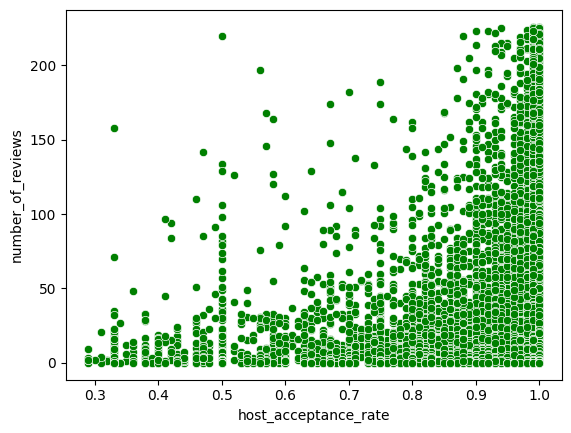

In [196]:
#host_acceptance_rate vs number_of_reviews
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="green", data=df)

In [197]:
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['number_of_reviews']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([58.41633535]),
 'rank_': 1,
 'singular_': array([17.45169945]),
 'intercept_': -25.57117435624052}

In [198]:
coef_Deter3=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter3

0.02424671345396201

**number of reviews = 58x -25**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

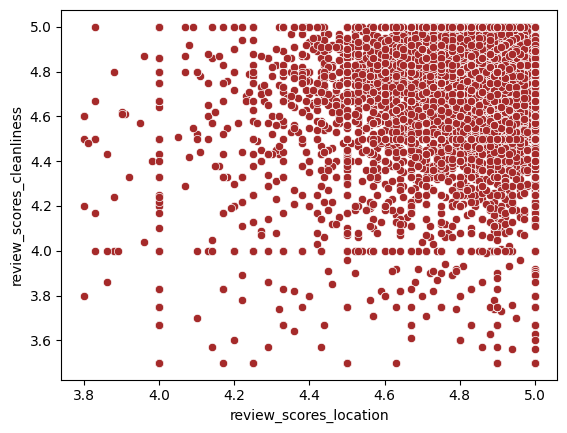

In [199]:
#review_scores_location vs review_scores_cleanliness
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="brown", data=df)

In [200]:
Vars_Indep= df[['review_scores_location']]
Var_Dep= df['review_scores_cleanliness']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.4222016]),
 'rank_': 1,
 'singular_': array([27.1401346]),
 'intercept_': 2.728987206055315}

In [201]:
coef_Deter4=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter4

0.10008213488656348

**review_scores_cleanliness = 0.42x + 2.72**

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.02380003]),
 'rank_': 1,
 'singular_': array([19283.9254019]),
 'intercept_': 35.596674075325275}

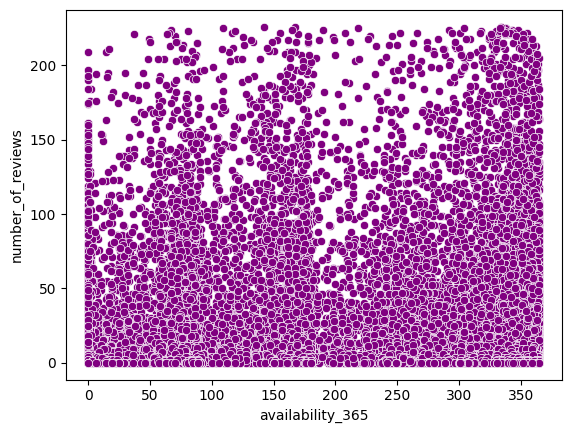

In [202]:
#availability_365 vs number_of_reviews
sns.scatterplot(x='availability_365', y='number_of_reviews', color="purple", data=df)
Vars_Indep= df[['availability_365']]
Var_Dep= df['number_of_reviews']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__


In [203]:
coef_Deter5=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter5

0.0049142192606346224

**Number of Reviews =-0.02x + 35**

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00547039]),
 'rank_': 1,
 'singular_': array([30.15681779]),
 'intercept_': 1.5641298716184007}

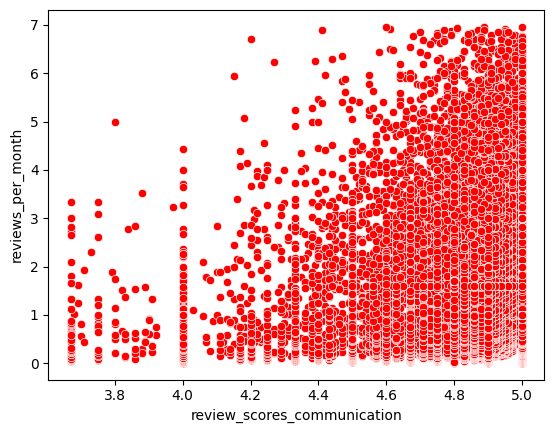

In [204]:
#reviews_per_month vs review_scores_communication
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="red", data=df)
Vars_Indep= df[['review_scores_communication']]
Var_Dep= df['reviews_per_month']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

In [205]:
coef_Deter6=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter6

6.53127890770655e-07

y = 0.05x + 1.56

In [207]:

data = {
    'coef': ['coef_Deter1', 'coef_Deter2', 'coef_Deter3', 'coef_Deter4', 'coef_Deter5', 'coef_Deter6'],
    'coeficiente': [0.06, 0.0005, 0.024, 0.10, 0.004, 0.0000007]
}

df1 = pd.DataFrame(data)
df1

,coef,coeficiente
0,coef_Deter1,6.000000e-02
1,coef_Deter2,5.000000e-04
2,coef_Deter3,2.400000e-02
3,coef_Deter4,1.000000e-01
4,coef_Deter5,4.000000e-03
5,coef_Deter6,7.000000e-07
